In [8]:
!pip install pandas_datareader

     -------------------------------------- 109.5/109.5 kB 2.2 MB/s eta 0:00:00


In [9]:
import pandas as pd
from pandas_datareader import data as web

spx = web.DataReader("SP500", "fred", start="2015-01-01", end="2025-01-01")["SP500"]
vix = web.DataReader("VIXCLS","fred", start="2015-01-01", end="2025-01-01")["VIXCLS"]

df_fred = pd.concat({"SPX": spx, "VIX": vix}, axis=1).dropna()
df_fred.to_csv("../data/vix_spx_fred.csv")
df_fred.tail()

,SPX,VIX
DATE,,
2024-12-24,6040.04,14.27
2024-12-26,6037.59,14.73
2024-12-27,5970.84,15.95
2024-12-30,5906.94,17.40
2024-12-31,5881.63,17.35


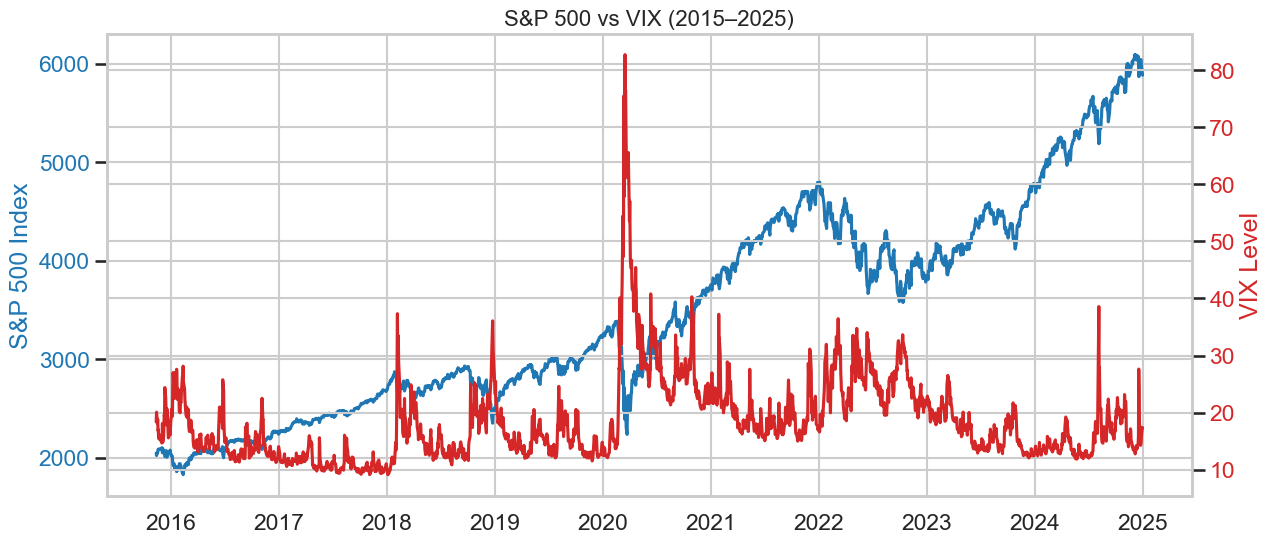

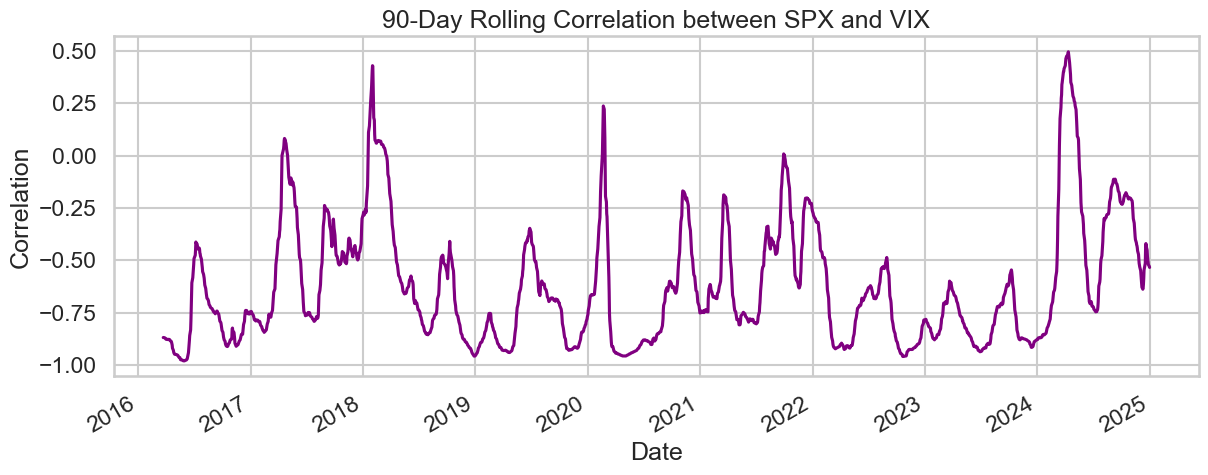

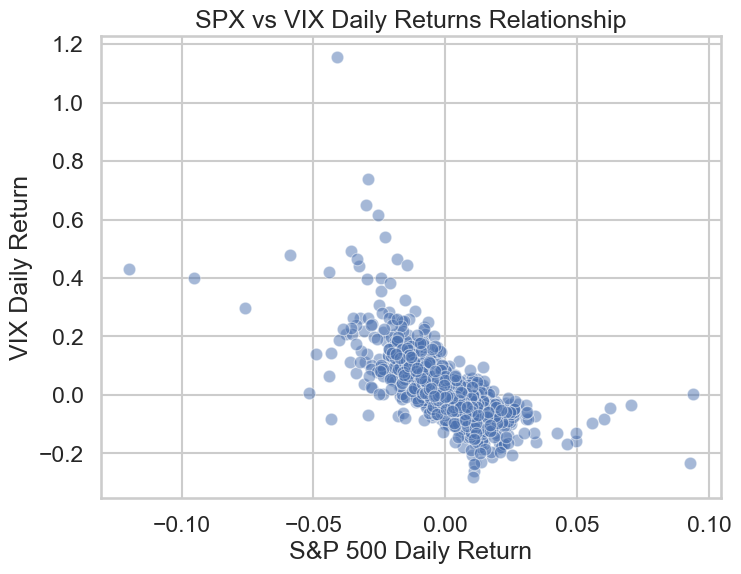

Correlation (Levels): 0.06476627640349515
Correlation (Daily Returns): -0.6978017450847714


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

# --- 1️⃣ SPX vs VIX Over Time ---
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(df_fred.index, df_fred["SPX"], color="tab:blue", label="S&P 500 (SPX)")
ax1.set_ylabel("S&P 500 Index", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.plot(df_fred.index, df_fred["VIX"], color="tab:red", label="VIX (Volatility Index)")
ax2.set_ylabel("VIX Level", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("S&P 500 vs VIX (2015–2025)", fontsize=16)
plt.show()

# --- 2️⃣ 90-Day Rolling Correlation ---
rolling_corr = df_fred["SPX"].rolling(90).corr(df_fred["VIX"])

plt.figure(figsize=(14,5))
rolling_corr.plot(color="purple")
plt.title("90-Day Rolling Correlation between SPX and VIX")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

# --- 3️⃣ Daily Returns Relationship ---
returns = df_fred.pct_change().dropna()

plt.figure(figsize=(8,6))
sns.scatterplot(x=returns["SPX"], y=returns["VIX"], alpha=0.5)
plt.title("SPX vs VIX Daily Returns Relationship")
plt.xlabel("S&P 500 Daily Return")
plt.ylabel("VIX Daily Return")
plt.show()

# --- 4️⃣ Quntify correlations ---
print("Correlation (Levels):", df_fred["SPX"].corr(df_fred["VIX"]))
print("Correlation (Daily Returns):", returns["SPX"].corr(returns["VIX"]))


In [11]:
import numpy as np

# --- 1️⃣ Basic descriptive statistics ---
summary = df_fred.describe()
print("Descriptive Statistics for SPX and VIX:\n", summary)

# --- 2️⃣ Annualized volatility ---
returns = df_fred.pct_change().dropna()
annualized_vol = returns.std() * np.sqrt(252)
print("\nAnnualized Volatility (approx):\n", annualized_vol)

# --- 3️⃣ Skewness and Kurtosis ---
skewness = returns.skew()
kurtosis = returns.kurtosis()
print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

# --- 4️⃣ Autocorrelation (volatility clustering proxy) ---
autocorr_spx = returns["SPX"].autocorr(lag=1)
autocorr_vix = returns["VIX"].autocorr(lag=1)
print("\n1-day autocorrelation:")
print("SPX:", autocorr_spx)
print("VIX:", autocorr_vix)

Descriptive Statistics for SPX and VIX:
                SPX          VIX
count  2298.000000  2298.000000
mean   3478.972737    18.434077
std    1054.407749     7.469381
min    1829.080000     9.140000
25%    2637.965000    13.315000
50%    3239.965000    16.535000
75%    4295.572500    21.570000
max    6090.270000    82.690000

Annualized Volatility (approx):
 SPX    0.180419
VIX    1.365293
dtype: float64

Skewness:
 SPX   -0.548975
VIX    2.741164
dtype: float64

Kurtosis:
 SPX    15.109351
VIX    22.484073
dtype: float64

1-day autocorrelation:
SPX: -0.15210608539531534
VIX: -0.06761897410616077
